# Section 1: Business Understanding 
The following questions are to help undersatnding the hosting business in  
Seattle area for those who are interested to invest in AirBNB properties.

**Question 1: Which neigbourhood is best investment for an airbnb business.**  

**Question 2: what is the best property type (house, apartment ...etc) to invest in.**

**Question 3: what is the  size the proerty in terms of number guests to accomodate.** 
 
**Question 4: predict the annual revenue based on number of guests, number of reviews and review scores rating.**  

# Section 2: Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import tree
import seaborn as sns

### Gather Data
loading dataframe from listing.csv file.  


In [2]:
df = pd.read_csv('C:/Users/u205860/Desktop/Training/DataScience/Course_2/Project/listings.csv')

### Assess Data
looking at the shape of the dataframe: number of raws and columns.  
Examining a sample of the dataframe. 

In [3]:
print('(number of rows, number of columns) =', df.shape)
df.head()

(number of rows, number of columns) = (3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


 Selecting some features from dataframe that we will conduct analysis on and help us answer the business questions.

In [4]:
# Selecting features from "listings.csv" file to help answers the business questions
vars_char = df[['beds', 'neighbourhood_cleansed', 'property_type', 'price', 'guests_included', 'availability_365', 'number_of_reviews', 'review_scores_rating']]

Checking the number of NaN values for each column in the selected features

In [6]:
def counting_nan_values(single_column, column_head):
    '''
    returns the number of NaN values in a column
    input:
            single column from the dataframe
            The column head name in string format
    output:
            nan_count: represents the number of NaN values in the column

    '''
    nan_count = single_column.isna().sum()
    if nan_count == 0:
        print(f'The number of the NaN values in the "{column_head}" column=', nan_count)
    else:
        print(f'The number of the NaN values in the "{column_head}" column=', nan_count, ' ;(Data cleaning is needed in this column for the NaN values)')
    return nan_count



# finding the number of NaN in the 'beds' column
counting_nan_values(vars_char['beds'], 'beds')

# finding the number of NaN in the 'neighbourhood_cleansed' column
counting_nan_values(vars_char['neighbourhood_cleansed'], 'neighbourhood_cleansed')

# finding the number of NaN in the 'property_type' column
counting_nan_values(vars_char['property_type'], 'property_type')

# finding the number of NaN in the 'price' column
counting_nan_values(vars_char['price'], 'price')

# finding the number of NaN in the 'guests_included' column
counting_nan_values(vars_char['guests_included'], 'guests_included')

# finding the number of NaN in the 'availability_365' column
counting_nan_values(vars_char['availability_365'], 'availability_365')

# finding the number of NaN in the 'number_of_reviews' column
counting_nan_values(vars_char['number_of_reviews'], 'number_of_reviews')

# finding the number of NaN in the 'review_scores_rating' column
counting_nan_values(vars_char['review_scores_rating'], 'review_scores_rating')


The number of the NaN values in the "beds" column= 1  ;(Data cleaning is needed in this column for the NaN values)
The number of the NaN values in the "neighbourhood_cleansed" column= 0
The number of the NaN values in the "property_type" column= 1  ;(Data cleaning is needed in this column for the NaN values)
The number of the NaN values in the "price" column= 0
The number of the NaN values in the "guests_included" column= 0
The number of the NaN values in the "availability_365" column= 0
The number of the NaN values in the "number_of_reviews" column= 0
The number of the NaN values in the "review_scores_rating" column= 647  ;(Data cleaning is needed in this column for the NaN values)


647

# Section 3: Data preperations  
### Data Cleaning
After looking at the number of NaN values for each column in the selected features in the **Assess Data** section,  
it is found that the 'Beds' column has 1 NaN value, 'Property_type' has 1 NaN value and the 'review_scores_rating' has 647 NaN values.  
Since the total number of NaN values is relatively small compared to the total number of rows (3818 row), it was decided to drop all   
NaN values from all selected features. 

In [7]:
# removing all rows where "beds" column has a NaN value
vars_char = vars_char.dropna(subset=['beds'], axis=0)

# removing all rows where "property_type" column has a NaN value
vars_char = vars_char.dropna(subset=['property_type'], axis=0)

# removing all rows where "review_scores_rating" column has a NaN value
vars_char = vars_char.dropna(subset=['review_scores_rating'], axis=0)

removing the $ sign and the comma from the "price" column and convert it from string to float. 

In [8]:
# removing the $ sign from the column "price" 
vars_char['price'] = vars_char['price'].str.replace('$', '')

# removing the comma and conversting the column "price" from object to float
vars_char['price'] = vars_char['price'].str.replace(',' , '').astype(float)

# converting the column to float for chart displaying purpose.
vars_char['guests_included'] = vars_char['guests_included'].astype(float)

## Section 3: Modeling
To answer some of the business questions, it is important to estimate the annual revenue.  
The calcutaions estimates the number of days booked based on an assumption that all days the  
property is not available means it is booked. Another assumption is using the daily rate only   
and not considering any weekly or monthly discounted rates.

In [9]:
# estimated annual revenue 
vars_char['booked_365'] = 365 - vars_char['availability_365']
vars_char['revenue_FY'] = vars_char['booked_365'] * vars_char['price']

# changing the revenue to column to be in millions
vars_char['revenue_FY'] = vars_char['revenue_FY']/1000000

To answer **business questions 1 & 2**, we need to group the revenue by:  
- Property type
- Neighborhood   

In [10]:
## The below code to answer: ##
## Questions 1 & 2 ##

# annual revenue for each property type 
revenue_by_property_type = vars_char.groupby('property_type')['revenue_FY'].sum().reset_index()
revenue_by_property_type = revenue_by_property_type.sort_values(by='revenue_FY', ascending=False).reset_index(drop=True)

# annual revenue for each Neighbourhood
revenue_by_neighbourhood = vars_char.groupby('neighbourhood_cleansed')['revenue_FY'].sum().reset_index()
revenue_by_neighbourhood = revenue_by_neighbourhood.sort_values(by='revenue_FY', ascending=False).reset_index(drop=True)

The following modeling is to address **business question 3**.  
  
In this modeling, we need incorporate the findings from questions 1 & 2, which are:  
- "houses" and "apartments" are with highest revenue for property type.
- "Belltown" and "Broadway" are with highest revenue for neighborhood.  
  
The following cell is to create two dataframes that are filtered for  
for property type and for neighborhood with highest revenues as following:  
- vars_for_house: where all columns are filtered for:
   -  property type = House
   -  neighborhood = Belltown and Broadway
- vars_for_apartment: where all columns are filtered for:
   -  property type = Apartment
   -  neighborhood = Belltown and Broadway



In [11]:
## The below code to answer: Question 3 ##
# filtering all columns for houses in Belltwon and Brodway neighborhoods
vars_for_house = vars_char[vars_char['property_type'] == 'House']
vars_for_house = vars_for_house[vars_for_house['neighbourhood_cleansed'].isin(['Belltown', 'Broadway'])]

# filtering all columns for apartments in Belltwon and Brodway neighborhoods
vars_for_apartment = vars_char[vars_char['property_type'] == 'Apartment']
vars_for_apartment = vars_for_apartment[vars_for_apartment['neighbourhood_cleansed'].isin(['Belltown', 'Broadway'])]

To narrow down our focus on the features needed to address question 3,  
four sub-dataframes are created from the above two dataframes. For each dataframe  
created in the above cell, we created two addtional dataframes; one including 'Beds'  
and the other inlcudes 'guests_included' features as folloing:

- 'revenue_FY', 'guests_included' and 'neighbourhood_cleansed'.  
- 'revenue_FY', 'beds' and 'neighbourhood_cleansed'. 

In [12]:

# selecting three columns only, revenue_FY, guests_included, neighbourhood_cleansed
revenue_for_house_by_guests = vars_for_house[['revenue_FY', 'guests_included', 'neighbourhood_cleansed']]
revenue_for_apartment_by_guests = vars_for_apartment[['revenue_FY', 'guests_included', 'neighbourhood_cleansed']]

# selecting three columns only, revenue_FY, beds, neighbourhood_cleansed
revenue_for_house_by_beds = vars_for_house[['revenue_FY', 'beds', 'neighbourhood_cleansed']]
revenue_for_apartment_by_beds = vars_for_apartment[['revenue_FY', 'beds', 'neighbourhood_cleansed']]

The following code cell is to group the above four dataframes by revenue and rearrange the rows in a descending order. 

In [13]:

# revenue for houses by number of guests in BellTown and Broadway neighborhoods
revenue_for_house_by_guests = revenue_for_house_by_guests.groupby(['guests_included', 'neighbourhood_cleansed'])['revenue_FY'].sum().reset_index()

# revenue for apartments by number of guests in BellTown and Broadway neighborhoods
revenue_for_apartment_by_guests = revenue_for_apartment_by_guests.groupby(['guests_included', 'neighbourhood_cleansed'])['revenue_FY'].sum().reset_index()

# revenue for houses by number of beds in BellTown and Broadway neighborhoods
revenue_for_house_by_beds = revenue_for_house_by_beds.groupby(['beds', 'neighbourhood_cleansed'])['revenue_FY'].sum().reset_index()

# revenue for apartments by number of beds in BellTown and Broadway neighborhoods
revenue_for_apartment_by_beds = revenue_for_apartment_by_beds.groupby(['beds', 'neighbourhood_cleansed'])['revenue_FY'].sum().reset_index()

The following modeling to address **Question 4**.  
This cell is to create a linear regression model using 'number_of_reviews', 'review_scores_rating' and 'guests_included'  
as input features to predeict 'revenue_FY'

In [14]:
## The below code to answer: Question 4 ##
# using Linear regression to predict revenue based on number of guests, number of reviews and review scores rating.
X = vars_char[['number_of_reviews', 'review_scores_rating', 'guests_included']] 
y = vars_char['revenue_FY']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#Instantiate
lm_model = LinearRegression(positive=True) 
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)# Predictions here
r2_test = r2_score(y_test, y_test_preds) # Rsquared here

# comupting correlations between all variables
vars_char_corr = vars_char[['revenue_FY', 'number_of_reviews', 'review_scores_rating', 'guests_included']]

print('r2_test = ', r2_test)


r2_test =  0.09133937937145054


## Section 4: Evaluate the Results


 ### Question 1: Which neigbourhood is best investment for an airbnb business.  


Text(0, 0.5, 'Annual Revenue [in millions]')

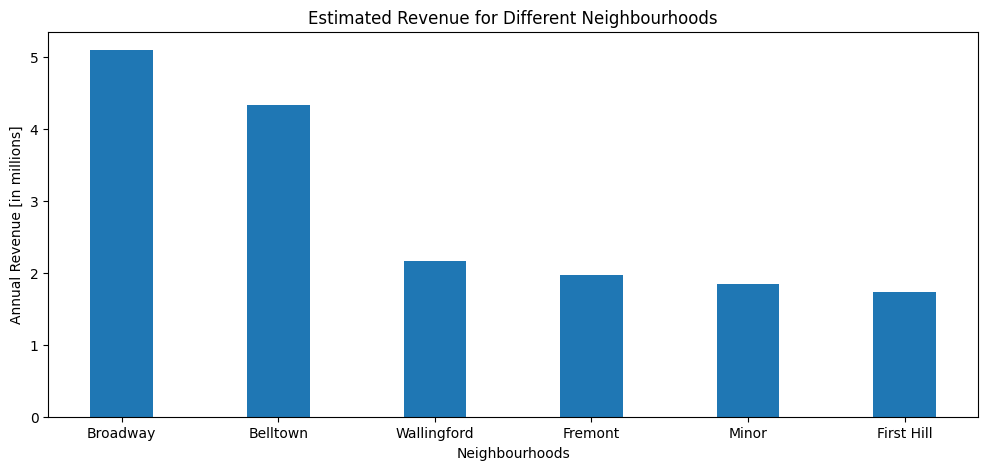

In [15]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

ax1.bar(revenue_by_neighbourhood['neighbourhood_cleansed'].head(6), revenue_by_neighbourhood['revenue_FY'].head(6), width=0.4, align='center')
ax1.set_xticks(range(len(revenue_by_neighbourhood['neighbourhood_cleansed'].head(6))))
ax1.set_title('Estimated Revenue for Different Neighbourhoods')
ax1.set_xlabel('Neighbourhoods')
ax1.set_ylabel('Annual Revenue [in millions]')


Bar chart above shows the estimated full year annual revenue for different neighborhoods in Seattle. The chart shows that Broadway  
has the highest revenue of more than 5 million dollars while Belltown comes second with more than 4 million dollars. The highest  
two neighborhoods (Broadway and Belltown) are picked for further analysis in question 3. 


### Question 2: what is the best property type (house, apartment ...etc) to invest in.



Text(0, 0.5, 'Annual Revenue [in millions]')

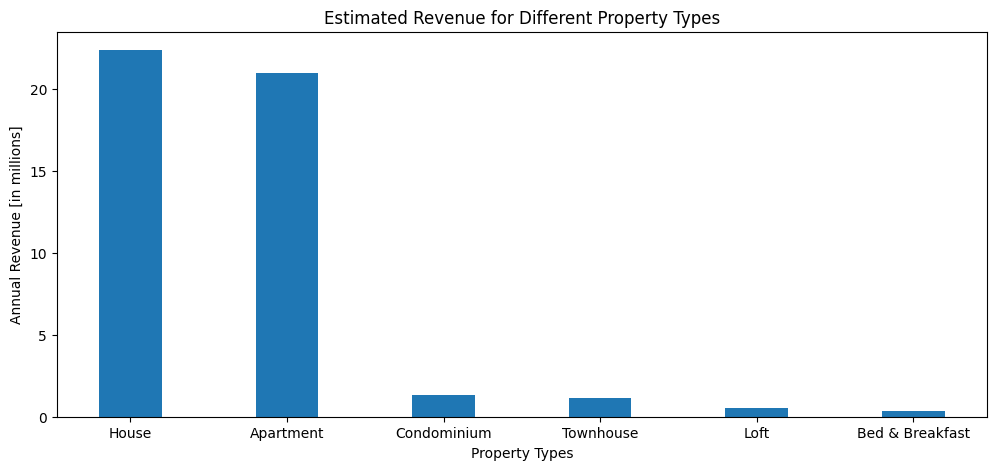

In [16]:
fig, (ax2) = plt.subplots(1, 1, figsize=(12, 5))

ax2.bar(revenue_by_property_type['property_type'].head(6), revenue_by_property_type['revenue_FY'].head(6), width=0.4, align='center')
ax2.set_xticks(range(len(revenue_by_property_type['property_type'].head(6))))
ax2.set_title('Estimated Revenue for Different Property Types')
ax2.set_xlabel('Property Types')
ax2.set_ylabel('Annual Revenue [in millions]')

The chart above shows the estimated full year annual revenue for for different property types in Seattle.  
The chart shows that houses and apartments are with the highest revenue of more than 20 million dollars,  
with the houses being a bit higher than apartments. These results are also taken for further analysis in question 3.

### Question 3: what is the  size the property in terms of number guests to accomodate. 
 


Text(0, 0.5, 'Annual Revenue [in millions]')

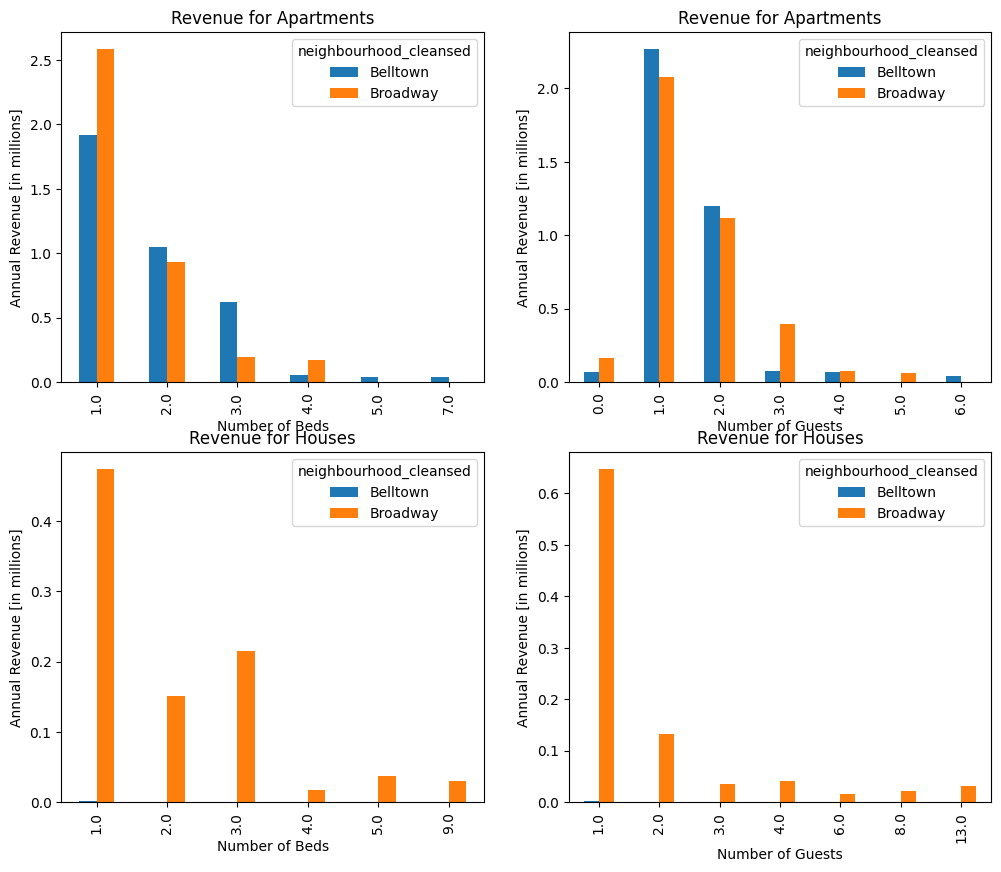

In [17]:

revenue_for_apartment_by_beds = revenue_for_apartment_by_beds.pivot(index='beds', columns='neighbourhood_cleansed', values='revenue_FY')
revenue_for_apartment_by_guests = revenue_for_apartment_by_guests.pivot(index='guests_included', columns='neighbourhood_cleansed', values='revenue_FY')
revenue_for_house_by_beds = revenue_for_house_by_beds.pivot(index='beds', columns='neighbourhood_cleansed', values='revenue_FY')
revenue_for_house_by_guests = revenue_for_house_by_guests.pivot(index='guests_included', columns='neighbourhood_cleansed', values='revenue_FY')


fig, axs = plt.subplots(2, 2, figsize=(12, 10))

revenue_for_apartment_by_beds.plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Revenue for Apartments')
axs[0, 0].set_xlabel('Number of Beds')
axs[0, 0].set_ylabel('Annual Revenue [in millions]')


revenue_for_apartment_by_guests.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_title('Revenue for Apartments')
axs[0, 1].set_xlabel('Number of Guests')
axs[0, 1].set_ylabel('Annual Revenue [in millions]')

revenue_for_house_by_beds.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Revenue for Houses')
axs[1, 0].set_xlabel('Number of Beds')
axs[1, 0].set_ylabel('Annual Revenue [in millions]')

revenue_for_house_by_guests.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Revenue for Houses')
axs[1, 1].set_xlabel('Number of Guests')
axs[1, 1].set_ylabel('Annual Revenue [in millions]')


After narrowing down our focus on Broadway and Belltown neighborhoods and on houses and apartments property types. The above  
is designed to address this question by looking at four bar charts for houses and apartments revenues by the number of beds and  
number of guests included at the two high revenue neighborhoods of Broadway and Belltown. After examining the charts, one can  
see that an apartment with one bed and one guest at Broadway has the highest estimated annual revenue in Seattle area.

### Question 4: predict the annual revenue based on number of guests, number of reviews and review scores rating.

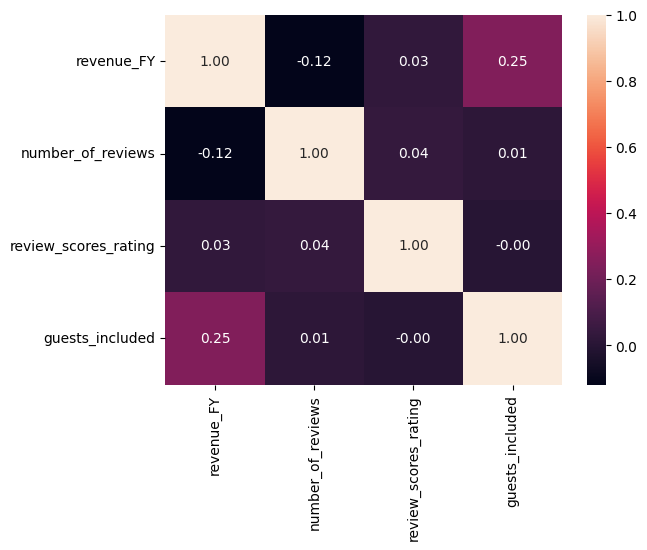

In [18]:
sns.heatmap(vars_char_corr.corr(), annot=True, fmt=".2f");

 It is always useful to develop a machine learning tool that can predict the annual revenue based on some known features.  
For this prediction, the selected features were number of guests, number of reviews and the review score rating. Using different  
supervised machine learning models, the r2 error came low which illustrates low confidence in the prediction model. After examining  
the correlationcs between these features (shown in the figure above), it is found to be relativly low.